In [1]:
import geopandas as gpd
from pathlib import Path
from processing.parse_data import load_insar_data
from processing.grid import generate_hex_grid_from_geometry
from processing.figures import plot_map

In [2]:
folder_path = './input_data'
bbox_path = './input_data/bbox.geojson'
reference_epsg = 4326
working_epsg = 3945
columns_to_plot = ['mean_velocity', 'acceleration']

In [3]:
folder = Path(folder_path)
filepaths = [path for path in folder.rglob('*.csv')]
print('Found ' + str(len(filepaths)) + ' files, loading...')
bbox = gpd.read_file(bbox_path)
gdf_insar = load_insar_data(filepaths, bbox)
print('Loaded ' + str(len(gdf_insar)) + ' insar points of measures.')

Found 6 files, loading...
Loaded 3484 insar points of measures.


In [4]:
hex_grid = generate_hex_grid_from_geometry(bbox, 50, working_epsg).reset_index()
gdf_insar_grid = hex_grid.sjoin(gdf_insar).drop(columns='index_right')

In [5]:
columns = ['index', 'orbite']
columns.extend(columns_to_plot)
gdf_stats = gdf_insar_grid[columns].groupby(['index', 'orbite']).mean().reset_index()

gdf_stats = gdf_stats.merge(hex_grid, on='index')
gdf_stats = gpd.GeoDataFrame(gdf_stats, geometry='geometry', crs=hex_grid.crs)
gdf_stats.to_file('output_data/pre_study_stats.geojson', driver='GeoJSON')

Write mean_velocity in ascending orbite.
Write acceleration in ascending orbite.
Write mean_velocity in descending orbite.
Write acceleration in descending orbite.


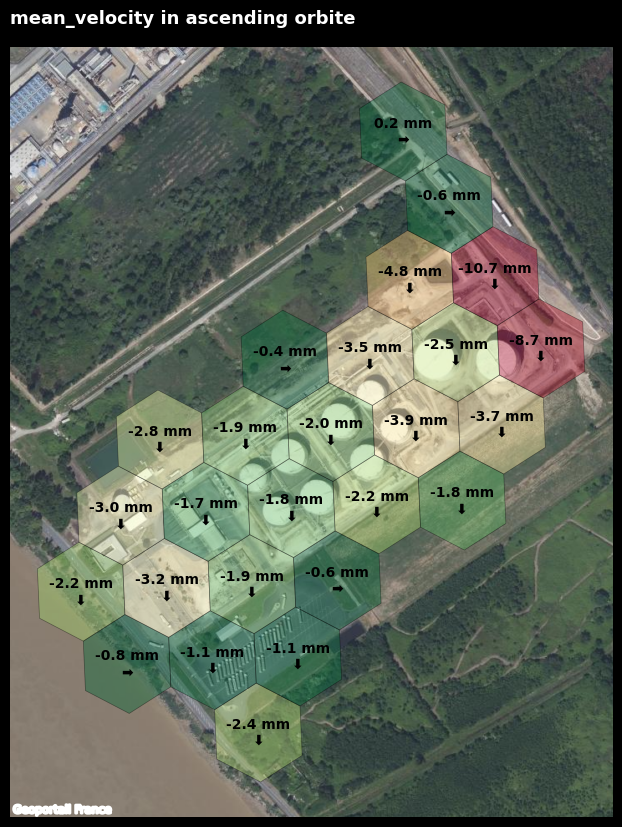

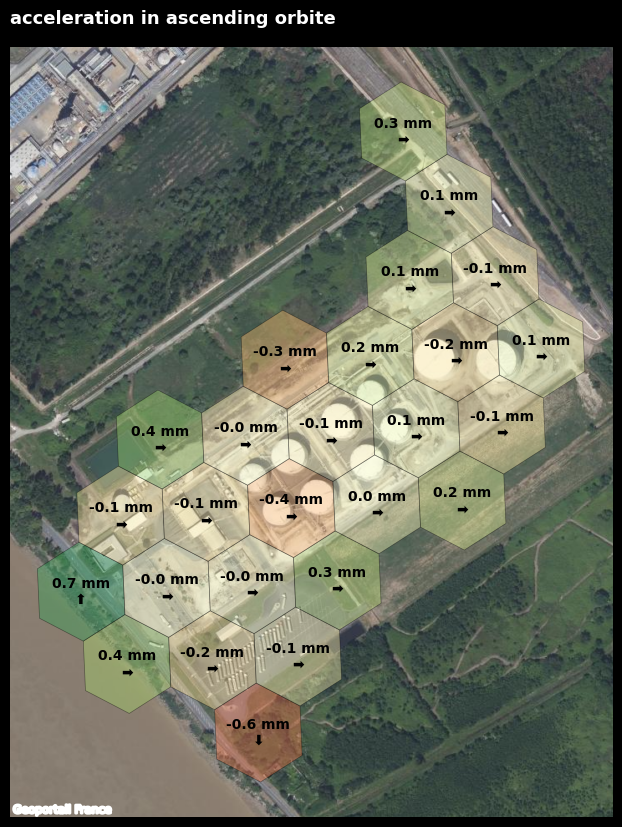

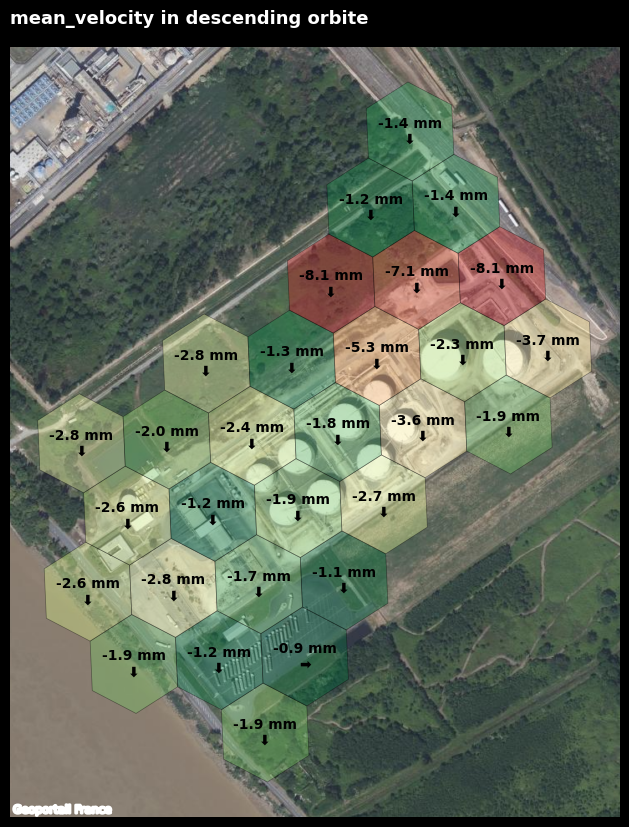

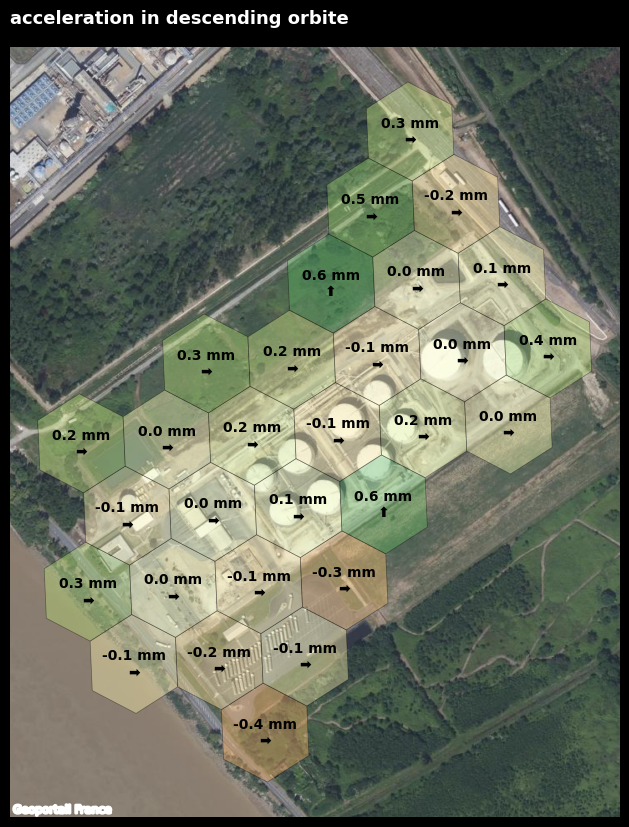

In [6]:
for orbite in gdf_stats['orbite'].unique():
    gdf_stats_orbite = gdf_stats[gdf_stats['orbite'] == orbite]
    plot_map(gdf_stats_orbite, 'mean_velocity', vmin=-9, vcenter=-3, vmax=-1, column_unit='mm', vmin_label=-1, vcenter_label=1)
    plot_map(gdf_stats_orbite, 'acceleration', vmin=-1, vcenter=0, vmax=1, column_unit='mm', vmin_label=-0.5, vcenter_label=0.5)